Импортируем нужные библиотеки

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
from datetime import datetime
from dotenv import load_dotenv
import os
from IPython.display import display


Импортируем переменные из .env

In [2]:
load_dotenv(".env")

True

Подключаемся к бд

In [3]:
conn = psycopg2.connect(
    host="localhost",
    port=os.getenv("dbPort"),
    database=os.getenv("dbName"),
    user=os.getenv("dbUser"),
    password=os.getenv("dbPassword")
)

Подгружаем данные из бд

In [4]:
query = "SELECT * FROM weather_station_data ORDER BY timestamp;"
df = pd.read_sql_query(query, conn)
conn.close()
df['timestamp'] = pd.to_datetime(df['timestamp'])


/tmp/ipykernel_310222/1983019984.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Выводим средние, минимальные и максимальные данные по каждому столбцу

In [8]:
display(df[['temperature', 'humidity', 'pressure', 'wind_speed']].describe().loc[['mean', 'min', 'max']])

,temperature,humidity,pressure,wind_speed
mean,1.458698,84.340021,749.552911,5.411633
min,-2.260000,75.000000,748.510000,0.000000
max,8.500000,94.000000,750.290000,15.500000


Выводим графики по данным из бд

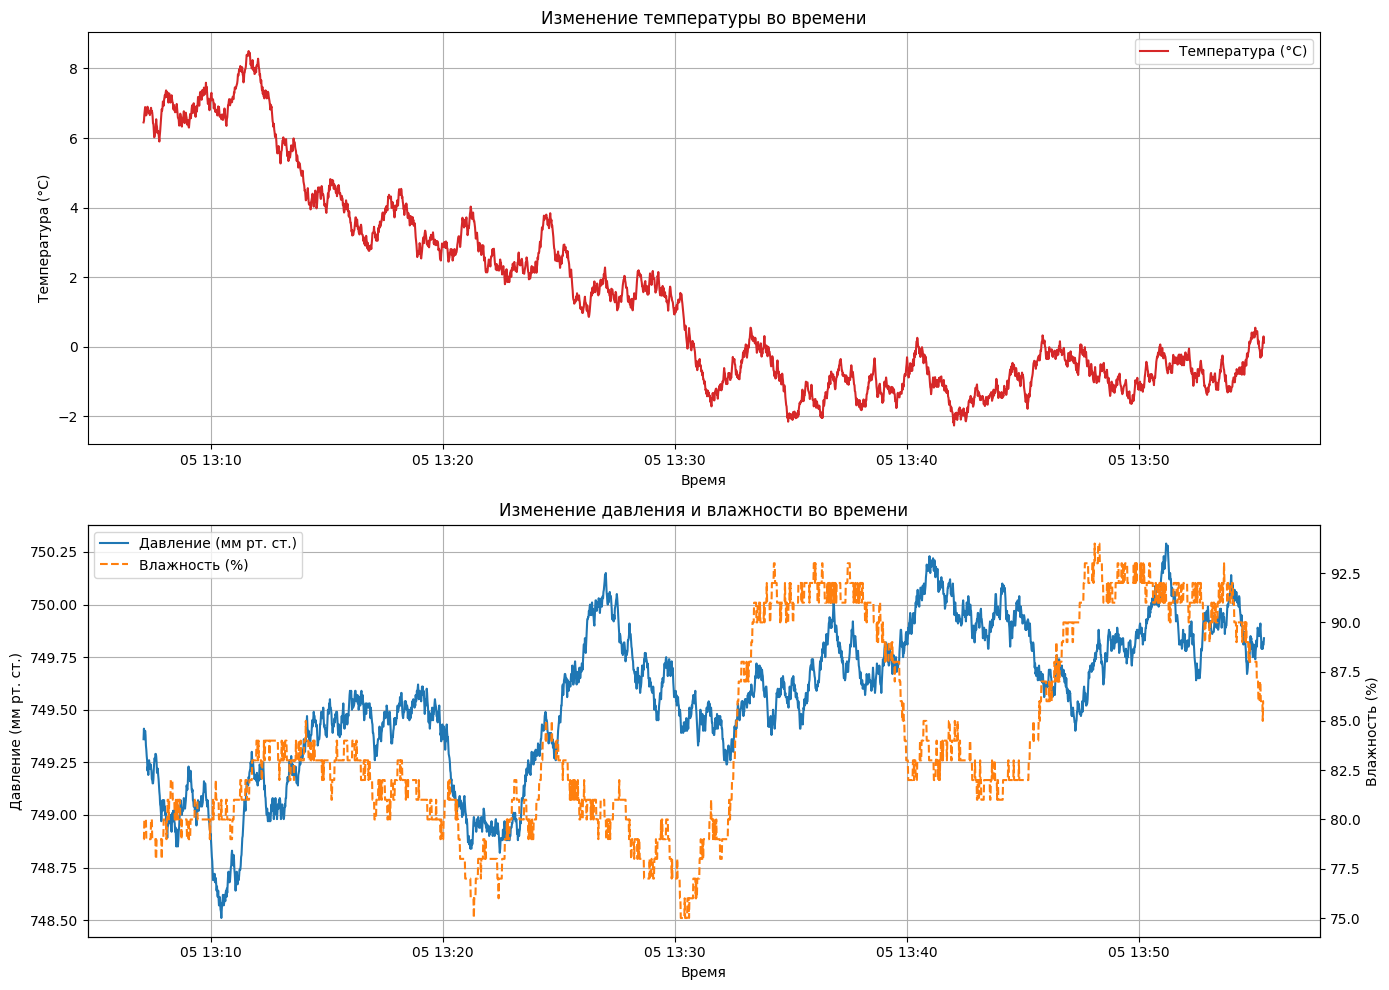

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# график температуры к времени
axes[0].plot(df['timestamp'], df['temperature'], label='Температура (°C)', color='tab:red')
axes[0].set_title('Изменение температуры во времени')
axes[0].set_xlabel('Время')
axes[0].set_ylabel('Температура (°C)')
axes[0].grid(True)
axes[0].legend()

#график давления и влажности к времени
ax1 = axes[1]
ax2 = ax1.twinx()

line1 = ax1.plot(df['timestamp'], df['pressure'], label='Давление (мм рт. ст.)', color='tab:blue')
ax1.set_title('Изменение давления и влажности во времени')
ax1.set_xlabel('Время')
ax1.set_ylabel('Давление (мм рт. ст.)')
ax1.grid(True)

line2 = ax2.plot(df['timestamp'], df['humidity'], label='Влажность (%)', color='tab:orange', linestyle='--')
ax2.set_ylabel('Влажность (%)')

#легенда
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()